## Sampling from a Poisson distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import logistic
from time import time

Complete the following code to sample from a Poisson distribution using the direct inversion method.
You should only use uniform random variables on $[0,1]$.

In [2]:
def poisson_sampling_direct(llambda,n):
    sample = []
    for _ in range(n):
        U = np.random.uniform(0, 1)
        k = 0
        prob_k = np.exp(-llambda)
        cum_prob = prob_k
        while cum_prob < U:
            k += 1
            prob_k = prob_k * llambda/(k)
            cum_prob += prob_k
        sample.append(k)
    return sample

Test your method comparing the emperical histogram obtained from the method you have implemented and the one obtained using the function np.random.poisson.
You will consider $\lambda \in \{0.1,1,10\}$.

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


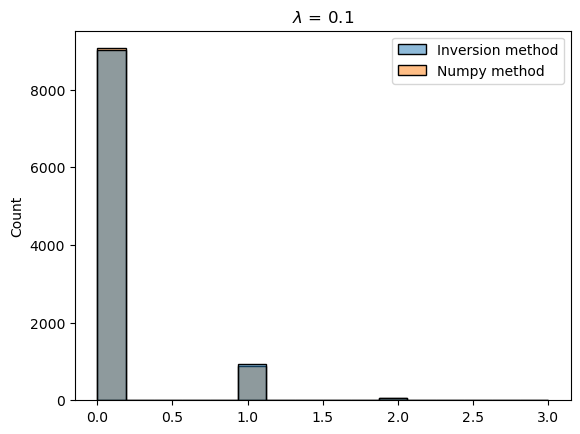

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


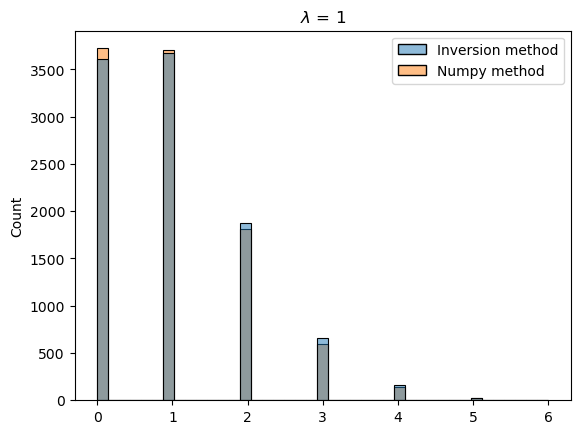

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


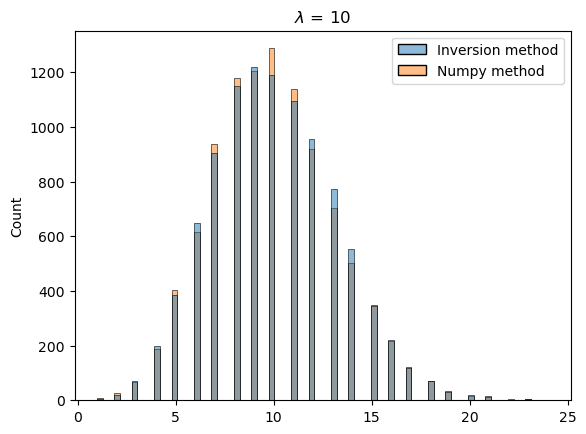

In [3]:
lambdas = [0.1, 1, 10]
n = 10000

for i, L in enumerate(lambdas):
    samples = dict()
    samples['Inversion method']= poisson_sampling_direct(L, n)
    samples['Numpy method'] = np.random.poisson(L, n)
    
    sns.histplot(samples)
    plt.title(rf'$\lambda$ = {L}')
    plt.show()

In the following we aim to sample from a Poisson distribution using the accept-reject method with instrumental distribution based on the logistic distribution with parameter $\alpha = \lambda$ and $\beta = \pi/\sqrt{2\lambda}$.
You should only use uniform random variables on $[0,1]$.

We first implement a method to sample from the logistic distribution with parameter $\alpha$ and $\beta$ restricted to $[-1/2,\infty)$.

In [4]:
# Make a function to sample from the logistic distribution with parameter
# alpha and beta using the inverse transform method

def logistic_sampling(alpha,beta,n):
    U = np.random.rand(n)
    return alpha-beta * np.log(1/U - 1)


# Make a function to sample from the logistic distribution with parameter
# alpha and beta given $X \leq 1/2$. 

def logistic_sampling_half(alpha,beta,n):
    F_half = 1/(1 + np.exp(-(-1/2-alpha)/beta))
    U = np.random.rand(n)
    return alpha - beta * np.log(1/(U*(1-F_half)+ F_half) - 1)

We now aim to implement a function which gives the probability $\mathbb{P}(N=k)$ where $N = \lfloor X +1/2 \rfloor$  where $X$ is distributed according to the logistic distribution with parameter $\alpha$ and $\beta$ restricted to $[-1/2,\infty)$.

*Question*: compute for any $k\in\mathbb{N}$, $\mathbb{P}(N=k)$.

We can express the probability as:

$\mathbb{P}(N = k) = \frac{\mathbb{P}\left(k - \frac{1}{2} \leq X < k + \frac{1}{2}\right)}{\mathbb{P}\left(- \frac{1}{2} \leq X < \infty\right)}$

And using the CDF for logistic distribution, which is given by $F(x) = \frac{1}{1 + e^{-\frac{x - \alpha}{\beta}}}$, we can say that:

$\mathbb{P}(N = k) = \frac{F\left(k + \frac{1}{2}\right) - F\left(k - \frac{1}{2}\right)}{1 - F\left(- \frac{1}{2}\right) }$

Where:

$F\left(k + \frac{1}{2}\right) = \frac{1}{1 + e^{-\frac{k - \alpha + \frac{1}{2}}{\beta}}}$

$F\left(k - \frac{1}{2}\right) = \frac{1}{1 + e^{-\frac{k - \alpha - \frac{1}{2}}{\beta}}}$

$F\left(- \frac{1}{2}\right) = \frac{1}{1 + e^{-\frac{- \alpha - \frac{1}{2}}{\beta}}}$

Replacing the above in the probability formula:

$\mathbb{P}(N = k) = \frac{\frac{1}{1 + e^{-\frac{k - \alpha + \frac{1}{2}}{\beta}}} - \frac{1}{1 + e^{-\frac{k - \alpha - \frac{1}{2}}{\beta}}}}{1 - \frac{1}{1 + e^{-\frac{- \alpha - \frac{1}{2}}{\beta}}}}$

Make a function which returns $\log \mathbb{P}(N=k)$. You may use the function provided logexp.

In [5]:
def logexp(x):
    x1 = (x<= 4)*np.log(1+np.exp(x))
    x2 = (x > 4)*(x+np.log(1+np.exp(-x)))
    x = x1+x2
    return x

# Make a function which returns $\log P(N=k)$
def proba_N(k,alpha,beta):
    F1 = 1 / (1 + np.exp(-(k + 1/2 - alpha) / beta))
    F2 = 1 / (1 + np.exp(-(k - 1/2 - alpha) / beta))
    F3 = 1 / (1 + np.exp(-(-1/2 - alpha) / beta))
    p_k = np.log(F1-F2) - np.log(1-F3)
    return p_k

Verify that your code is correct by comparing the histogram you obtain from proba_N with an empirical histogram obtained from sampling from $N$

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


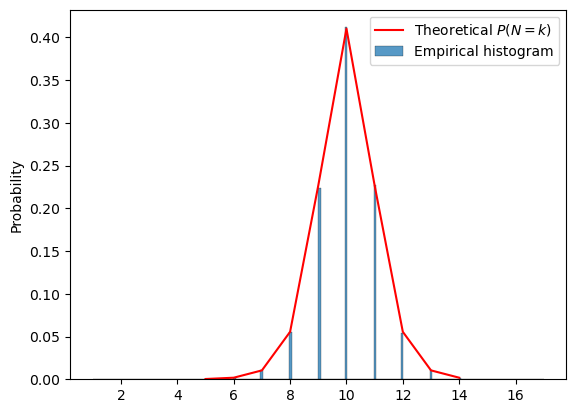

In [6]:
#Verify that your code is correct by comparing the histogram 
#you obtain from proba_N with an emperical histogram 
#obtained from sampling from $N$

llambda = 10
alpha = llambda 
beta= np.pi/np.sqrt(llambda*3)
n = 100000

X = np.arange(llambda/2, llambda + llambda/2)
samples = logistic_sampling_half(alpha, beta, n)
probas = np.exp([proba_N(k, alpha, beta) for k in X])

plt.plot(X, probas, color='red', label="Theoretical $P(N=k)$")
sns.histplot(np.floor(samples + 1/2), stat='probability', label="Empirical histogram")
plt.legend()

We recall that for any $\lambda$, it was stated in the course that 
$$
 \sup_n \lambda^n/(\mathbb{P}(N = n) e^{\lambda} n!) < 4 \times \lambda /(0.767 - 3.36/\lambda).
$$
Verify numerically that this is true for $\lambda \in \{10,100\}$.

In [7]:
def log_fact(n):
    if n == 0 or n == 1:
        return 0
    lfact = 0
    for i in range(2, int(n) + 1):
        lfact += np.log(i)
    return lfact

def find_log_leftside(llambda):
    alpha = llambda
    beta = np.sqrt(3*llambda)/np.pi
    n_min = max(0, int(llambda - 5*np.sqrt(llambda)))
    n_max = int(llambda + 5*np.sqrt(llambda))
    n_values = np.arange(n_min, n_max + 1)
    log_P = np.array([proba_N(n, alpha, beta) for n in n_values])

    # Remove -inf values
    valid_indices = np.isfinite(log_P)
    n_values = n_values[valid_indices]
    log_P = log_P[valid_indices]
    
    # Compute log of left side
    log_left = np.zeros(len(n_values))
    for i in range(len(n_values)):
        log_left[i] = n_values[i] * np.log(llambda) - log_P[i] - llambda - log_fact(n_values[i])

    # Return sup
    return np.max(log_left)

def find_log_rightside(llambda):
    log_right = np.log(1/(0.767 - 3.36/llambda))
    return log_right

lambdas = [10, 100]
for L in lambdas:
    left = find_log_leftside(L)
    right = find_log_rightside(L)
    if left < right:
        print(f"Inequality is true for lambda = {L}: {round(np.exp(left),3)} < {round(np.exp(right),3)}\n")
    else:
        print("Inequality is not true\n")

Inequality is true for lambda = 10: 1.309 < 2.32

Inequality is true for lambda = 100: 1.255 < 1.364



From the previous functions that we have implemented, code a function
that sample from the Poisson distribution using the accept-reject method
based on the logistic distribution restricted to $[-1/2,\infty]$ with 
parameter $\alpha = \lambda$ and $\beta = \pi/\sqrt{3\lambda}$.


In [8]:
# Make a function which samples from the Poisson distribution using the
# acceptance-rejection method using the logistic distribution

def log_fact(n):
    if n == 0 or n == 1:
        return 0
    lfact = 0
    for i in range(2, int(n) + 1):
        lfact += np.log(i)
    return lfact

def poisson_sampling_logistic(llambda, n):
    alpha = llambda
    beta = np.sqrt(3 * llambda)/np.pi
    c = 0.767 - 3.36/llambda
    s = []

    while len(s) < n:
        X = logistic_sampling_half(alpha, beta, n - len(s))
        U = np.random.random(n - len(s))
        N = np.floor(X + 1/2)
        k = np.log(c) - llambda + np.log(beta)
        N_accept = np.zeros_like(N,dtype=bool)
        for i in range(len(N)): 
            N_accept[i] = -(X[i] - alpha)/beta + np.log(U[i]/(1 + np.exp(-(X[i] - alpha)/beta))**2) <= k + N[i] * np.log(llambda) - log_fact(N[i])
        s += N[N_accept].tolist()
    return s[:n]

Verify your method by ploting the empirical histogram you obtained from the method you have implemented and the one of the Poisson distribution

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


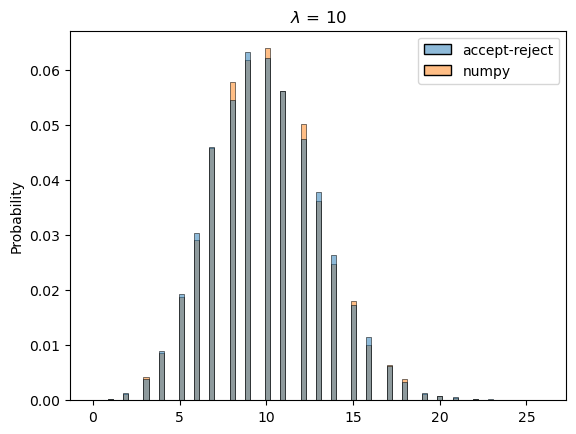

c:\Users\sabri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


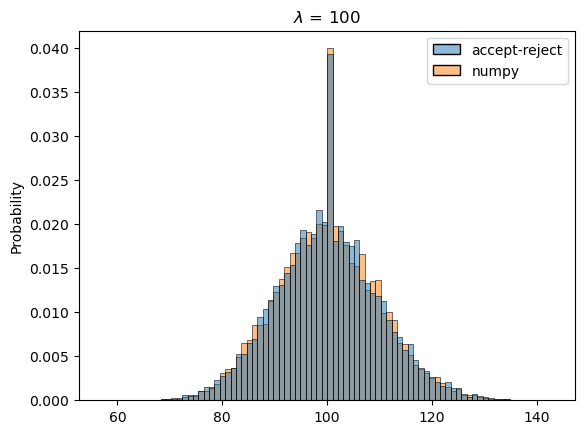

In [9]:
# Test your function for $\lambda \in \{10,100\}$
n = 10000
for L in [10, 100]:
    samples = {}
    samples['accept-reject'] = poisson_sampling_logistic(L, n)
    samples['numpy'] = np.random.poisson(L, n)
    sns.histplot(samples, stat='probability')
    plt.title(rf'$\lambda$ = {L}')
    plt.show()

Compare the computational times of the two methods that you have implemented
for sampling from the Poisson distribution for a number of samples $n=10000$ and 
$\lambda \in \{10,100,200\}$.

In [10]:
# Make a comparison of the two methods for $\lambda \in \{10,100\}$ and $n=10000$.
n = 10000
lambdas = [10, 100, 200]
for L in lambdas:
    samples = {}
    t0 = time()
    samples['accept-reject'] = poisson_sampling_logistic(L, n)
    t1 = time()
    samples['direct'] = poisson_sampling_direct(L, n)
    t2 = time()
    samples['numpy'] = np.random.poisson(L, n)
    print(f'''
    lambda = {L}
    time accept-reject (s) = {round(t1-t0,3)}
    time direct (s) = {round(t2-t1,3)}''')


    lambda = 10
    time accept-reject (s) = 0.599
    time direct (s) = 0.088

    lambda = 100
    time accept-reject (s) = 2.213
    time direct (s) = 0.35

    lambda = 200
    time accept-reject (s) = 4.198
    time direct (s) = 0.669
